## Exploratory Analysis

In [64]:
import pandas as pd
predictive_maintenance = pd.read_csv("data/predictive_maintenance.csv")
predictive_maintenance.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [65]:
predictive_maintenance.groupby('failure').count()

,date,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
failure,,,,,,,,,,,
0,124388,124388,124388,124388,124388,124388,124388,124388,124388,124388,124388
1,106,106,106,106,106,106,106,106,106,106,106


We have a major class imbalance.

In [2]:
predictive_maintenance.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [3]:
predictive_maintenance.device.describe()

count       124494
unique        1169
top       Z1F0QLC1
freq           304
Name: device, dtype: object

In [30]:
predictive_maintenance.corr()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
failure,1.000000,0.001983,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
metric1,0.001983,1.000000,-0.004250,0.003701,0.001836,-0.003376,-0.001522,0.000151,0.000151,0.001121
metric2,0.052902,-0.004250,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
metric3,-0.000948,0.003701,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
metric4,0.067398,0.001836,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
metric5,0.002270,-0.003376,-0.013999,-0.006696,-0.009773,1.000000,-0.017049,-0.009384,-0.009384,0.005949
metric6,-0.000550,-0.001522,-0.026350,0.009027,0.024870,-0.017049,1.000000,-0.012207,-0.012207,0.021152
metric7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
metric8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
metric9,0.001622,0.001121,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


In [31]:
predictive_maintenance.metric7.unique()

array([  0,  16,   8,  48,  32, 312,   6,  24,  40,  56,  96, 112, 136,
       152, 424, 240, 496, 744, 216,  72,  80, 176, 832, 128, 272, 736,
        22, 104], dtype=int64)

In [32]:
predictive_maintenance.metric8.unique()

array([  0,  16,   8,  48,  32, 312,   6,  24,  40,  56,  96, 112, 136,
       152, 424, 240, 496, 744, 216,  72,  80, 176, 832, 128, 272, 736,
        22, 104], dtype=int64)

## Model Development

In [34]:
from sklearn.model_selection import train_test_split
feature_cols = ['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric9']
X = predictive_maintenance[feature_cols]
y = predictive_maintenance.failure
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [37]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression() #using l2 regularization by default 
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [58]:
logisticRegr.score(X_test, y_test)

0.9991164303787301

In [59]:
y_pred = logisticRegr.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9991164303787301

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [44]:
from matplotlib import pyplot

In [49]:
probs = logisticRegr.predict_proba(X_test)
probs = probs[:, 0]
lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)

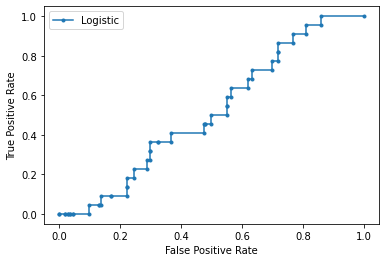

In [50]:
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [51]:
lr_auc = roc_auc_score(y_test, probs)
lr_auc

0.5158963920671522

In [57]:
logisticRegr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
from sklearn.metrics import recall_score
tpr = recall_score(y_test, y_pred)
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

In [56]:
fnr

1.0

## Save Model

In [24]:
import pickle
file_to_store = open("app/model.pickle", "wb")
pickle.dump(logisticRegr, file_to_store)
file_to_store.close()

In [25]:
with open("app/model.pickle", 'rb') as f:
    x = pickle.load(f)